In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Random Adversial Evolution

### Simple Model

In [2]:
simple_adv_df = pd.read_csv('simple_stats.csv', index_col = 0)

In [3]:
simple_adv_df

,tournament,best_winning_streak,mean_duration,stdev
0,1000.0,15.0,631.796,114.118072
1,2000.0,24.0,644.680,109.116780
2,3000.0,35.0,633.450,118.861699
3,4000.0,42.0,636.125,109.312576
4,5000.0,53.0,644.600,111.824237
...,...,...,...,...
245,246000.0,2203.0,2967.549,190.993428
246,247000.0,2211.0,2982.228,149.181574
247,248000.0,2217.0,2963.515,207.125614
248,249000.0,2223.0,2970.880,183.015900


In [4]:
simple_adv_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            240, 241, 242, 243, 244, 245, 246, 247, 248, 249],
           dtype='int64', length=250)

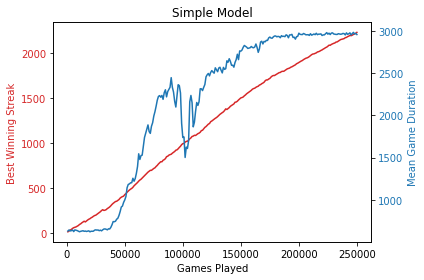

In [5]:
fig, ax1 = plt.subplots()

plt.title('Simple Model')

ax1.set_xlabel('Games Played')

color = 'tab:red'
ax1.set_ylabel('Best Winning Streak', color=color)
ax1.plot(simple_adv_df['tournament'], 
         simple_adv_df['best_winning_streak'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Mean Game Duration', color=color)
ax2.plot(simple_adv_df['tournament'], 
         simple_adv_df['mean_duration'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

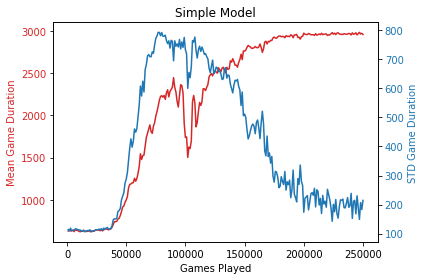

In [6]:
fig, ax1 = plt.subplots()

plt.title('Simple Model')

ax1.set_xlabel('Games Played')

color = 'tab:red'
ax1.set_ylabel('Mean Game Duration', color=color)
ax1.plot(simple_adv_df['tournament'], 
         simple_adv_df['mean_duration'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('STD Game Duration', color=color)
ax2.plot(simple_adv_df['tournament'], 
         simple_adv_df['stdev'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Complex Model

In [7]:
complex_adv_df = pd.read_csv('complex_stats.csv', index_col = 0)

In [8]:
complex_adv_df

,tournament,best_winning_streak,mean_duration,stdev
0,1000.0,16.0,640.666,113.996774
1,2000.0,30.0,645.135,110.960780
2,3000.0,42.0,633.670,112.449033
3,4000.0,50.0,637.575,111.931481
4,5000.0,57.0,641.483,114.184218
...,...,...,...,...
245,246000.0,2203.0,2946.395,240.549003
246,247000.0,2210.0,2903.928,345.066922
247,248000.0,2223.0,2929.494,282.735764
248,249000.0,2232.0,2914.985,309.554504


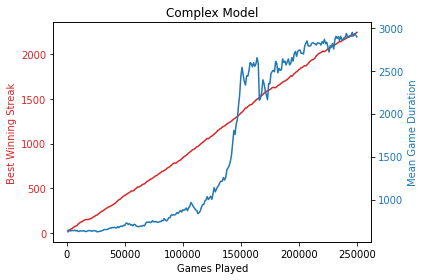

In [9]:
fig, ax1 = plt.subplots()

plt.title('Complex Model')

ax1.set_xlabel('Games Played')

color = 'tab:red'
ax1.set_ylabel('Best Winning Streak', color=color)
ax1.plot(complex_adv_df['tournament'], 
         complex_adv_df['best_winning_streak'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Mean Game Duration', color=color)
ax2.plot(complex_adv_df['tournament'], 
         complex_adv_df['mean_duration'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

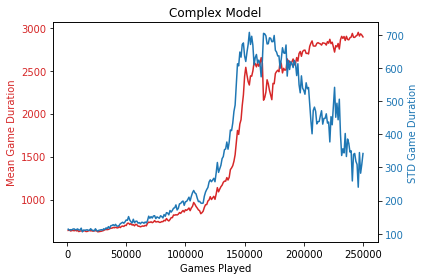

In [10]:
fig, ax1 = plt.subplots()

plt.title('Complex Model')

ax1.set_xlabel('Games Played')

color = 'tab:red'
ax1.set_ylabel('Mean Game Duration', color=color)
ax1.plot(complex_adv_df['tournament'], 
         complex_adv_df['mean_duration'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('STD Game Duration', color=color)
ax2.plot(complex_adv_df['tournament'], 
         complex_adv_df['stdev'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Complex vs Simple Model

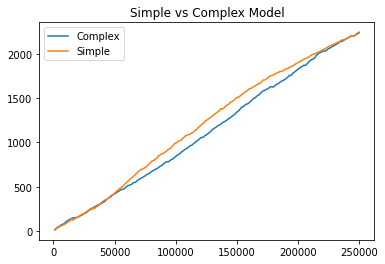

In [11]:
plt.title('Simple vs Complex Model')

plt.plot(complex_adv_df['tournament'], 
         complex_adv_df['best_winning_streak'], 
         label = "Complex")
plt.plot(simple_adv_df['tournament'], 
         simple_adv_df['best_winning_streak'], 
         label = "Simple")
plt.legend()

plt.show()

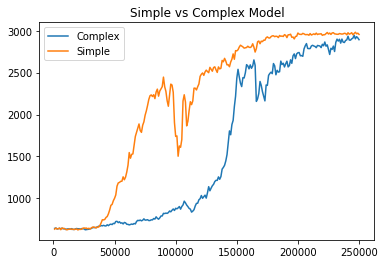

In [12]:
plt.title('Simple vs Complex Model')

plt.plot(complex_adv_df['tournament'], 
         complex_adv_df['mean_duration'], 
         label = "Complex")
plt.plot(simple_adv_df['tournament'], 
         simple_adv_df['mean_duration'], 
         label = "Simple")
plt.legend()

plt.show()

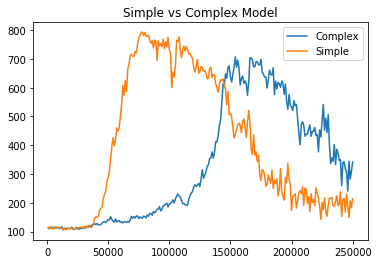

In [13]:
plt.title('Simple vs Complex Model')

plt.plot(complex_adv_df['tournament'], 
         complex_adv_df['stdev'], 
         label = "Complex")
plt.plot(simple_adv_df['tournament'], 
         simple_adv_df['stdev'], 
         label = "Simple")
plt.legend()

plt.show()

## Random Elitist Adv Evolution

### Setup

In [14]:
os.listdir('ga_stats')

['avg_length.npy',
 'avg_length_complex.npy',
 'avg_scores.npy',
 'avg_scores_complex.npy',
 'std_scores.npy',
 'std_scores_complex.npy']

In [15]:
avg_length = np.load('ga_stats/avg_length.npy')
avg_length_complex = np.load('ga_stats/avg_length_complex.npy')

avg_scores = np.load('ga_stats/avg_scores.npy')
avg_scores_complex = np.load('ga_stats/avg_scores_complex.npy')


std_scores = np.load('ga_stats/avg_scores.npy')
std_scores_complex = np.load('ga_stats/avg_scores_complex.npy')

In [16]:
avg_length_complex

array([636.4375   , 636.2890625, 620.75     , 635.1796875, 643.640625 ,
       632.0859375, 641.4375   , 632.5078125, 684.796875 , 621.84375  ,
       619.0078125, 687.3046875, 616.4453125, 633.671875 , 637.375    ,
       630.3515625, 628.3984375, 605.7578125, 648.9765625, 629.640625 ,
       637.4296875, 622.2109375, 655.9609375, 634.9375   , 640.9296875,
       641.1953125, 632.140625 , 638.8984375, 634.       , 634.1796875,
       623.4453125, 630.84375  , 621.40625  , 633.1484375, 632.8984375,
       632.1484375, 624.5234375, 603.921875 , 621.25     , 638.796875 ,
       630.9609375, 637.0078125, 631.7421875, 618.0625   , 627.921875 ,
       637.8203125, 629.5234375, 624.890625 , 610.5390625, 629.5859375,
       616.9921875, 623.9375   , 622.6328125, 627.390625 , 609.734375 ,
       626.34375  , 615.4453125, 630.78125  , 642.2265625, 645.578125 ,
       653.8671875, 629.875    , 627.9296875, 629.671875 , 644.8828125,
       633.0859375, 655.8125   , 638.296875 , 631.84375  , 648.5

In [17]:
elite_df = pd.DataFrame()

In [18]:
elite_df['avg_length_simple'] = avg_length
elite_df['avg_length_complex'] = avg_length_complex

elite_df['avg_scores_simple'] = avg_scores
elite_df['avg_scores_complex'] = avg_scores_complex

elite_df['std_scores_simple'] = std_scores
elite_df['std_scores_complex'] = std_scores_complex

In [19]:
elite_df

,avg_length_simple,avg_length_complex,avg_scores_simple,avg_scores_complex,std_scores_simple,std_scores_complex
0,636.437500,636.437500,4.25000,4.25000,4.25000,4.25000
1,636.289062,636.289062,4.21875,4.21875,4.21875,4.21875
2,620.750000,620.750000,4.09375,4.09375,4.09375,4.09375
3,635.179688,635.179688,4.00000,4.00000,4.00000,4.00000
4,643.640625,643.640625,4.12500,4.12500,4.12500,4.12500
...,...,...,...,...,...,...
195,640.718750,640.718750,4.00000,4.00000,4.00000,4.00000
196,640.250000,640.250000,3.78125,3.78125,3.78125,3.78125
197,617.890625,617.890625,4.12500,4.12500,4.12500,4.12500
198,622.414062,622.414062,3.96875,3.96875,3.96875,3.96875


### Simple and Complex

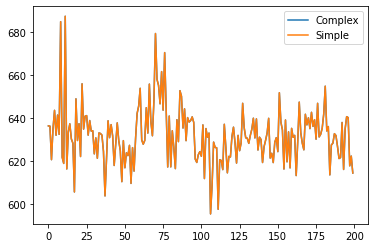

In [20]:
plt.plot(elite_df.index, 
         elite_df['avg_length_complex'], 
         label = "Complex")
plt.plot(elite_df.index, 
         elite_df['avg_length_simple'], 
         label = "Simple")
plt.legend()

plt.show()

## Braket Evolution

### Setup

In [21]:
os.listdir('bracket_on_complex_model')

['agents',
 'bracket_agent_datapoints_complex_model.csv',
 'train_hunger_games_on_fast_model.py']

In [22]:
os.listdir('bracket_on_simple_model')

['agends',
 'bracket_agent_datapoints_simple_model.csv',
 'train_hunger_games.py']

### Simple

In [23]:
simple_bracket_df = pd.read_csv(
    'bracket_on_simple_model/bracket_agent_datapoints_simple_model.csv', index_col = 0)

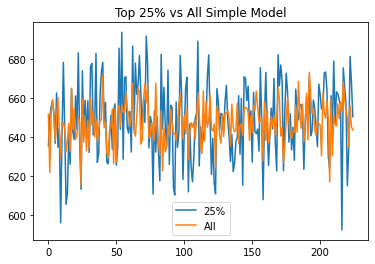

In [24]:
plt.title('Top 25% vs All Simple Model')

plt.plot(simple_bracket_df.index, 
         simple_bracket_df['mean time for top 25%'], 
         label = "25%")
plt.plot(simple_bracket_df.index, 
         simple_bracket_df['mean time for all'], 
         label = "All")
plt.legend()

plt.show()

### Complex

In [25]:
complex_bracket_df = pd.read_csv(
    'bracket_on_complex_model/bracket_agent_datapoints_complex_model.csv', index_col = 0)

In [26]:
complex_bracket_df

,best time,mean time for top 25%,standart deviation for top 25%,mean time for all,standart deviation for all
0,-0.457370,625.46875,103.132798,650.433071,116.681246
1,675.000000,647.90625,121.771138,629.078740,124.183735
2,848.000000,608.56250,111.633871,654.181102,127.719699
3,685.000000,649.87500,77.388529,661.094488,111.367055
4,451.000000,641.31250,97.281626,631.236220,109.725675
...,...,...,...,...,...
220,625.000000,607.84375,111.032121,628.653543,105.667014
221,710.000000,613.09375,119.874507,623.755906,115.571345
222,712.000000,653.50000,116.543179,645.677165,108.700548
223,749.000000,642.18750,111.607974,633.448819,112.715844


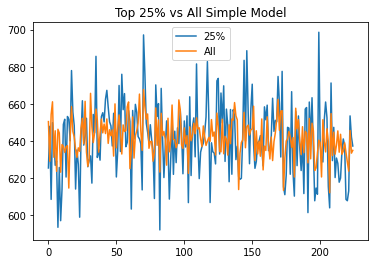

In [27]:
plt.title('Top 25% vs All Simple Model')

plt.plot(complex_bracket_df.index, 
         complex_bracket_df['mean time for top 25%'], 
         label = "25%")
plt.plot(complex_bracket_df.index, 
         complex_bracket_df['mean time for all'], 
         label = "All")
plt.legend()

plt.show()

## Friendly Evolution

### Simple

In [28]:
simple_friend_df = pd.read_csv(
    'friendly_on_simple_model/frindly_agent_datapoints_simple_model.csv', index_col = 0)

In [29]:
simple_friend_df

,best time,mean time for top 25%,standart deviation for top 25%,mean time for all,standart deviation for all
0,866.0,777.34375,43.437893,632.875000,114.295464
1,977.0,832.71875,52.405411,674.617188,132.772545
2,1106.0,850.46875,63.155059,689.593750,130.184751
3,1086.0,881.50000,65.018267,712.000000,133.836246
4,1092.0,869.68750,62.646048,698.796875,133.866092
...,...,...,...,...,...
195,3000.0,3000.00000,0.000000,2272.796875,777.050135
196,3000.0,3000.00000,0.000000,2268.718750,753.042848
197,3000.0,3000.00000,0.000000,2220.289062,752.179834
198,3000.0,3000.00000,0.000000,2315.500000,847.942501


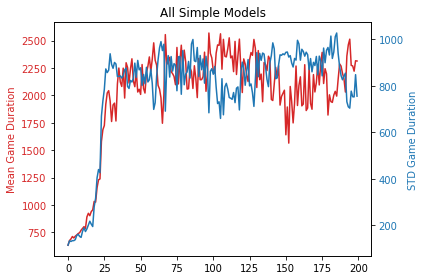

In [30]:
fig, ax1 = plt.subplots()

plt.title('All Simple Models')

color = 'tab:red'
ax1.set_ylabel('Mean Game Duration', color=color)
ax1.plot(simple_friend_df.index, 
         simple_friend_df['mean time for all'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('STD Game Duration', color=color)
ax2.plot(simple_friend_df.index, 
         simple_friend_df['standart deviation for all'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

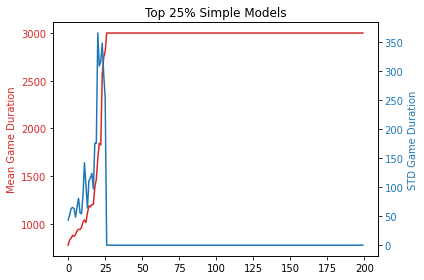

In [31]:
fig, ax1 = plt.subplots()

plt.title('Top 25% Simple Models')

color = 'tab:red'
ax1.set_ylabel('Mean Game Duration', color=color)
ax1.plot(simple_friend_df.index, 
         simple_friend_df['mean time for top 25%'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('STD Game Duration', color=color)
ax2.plot(simple_friend_df.index, 
         simple_friend_df['standart deviation for top 25%'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

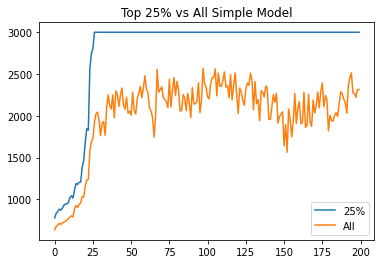

In [32]:
plt.title('Top 25% vs All Simple Model')

plt.plot(simple_friend_df.index, 
         simple_friend_df['mean time for top 25%'], 
         label = "25%")
plt.plot(simple_friend_df.index, 
         simple_friend_df['mean time for all'], 
         label = "All")
plt.legend()

plt.show()

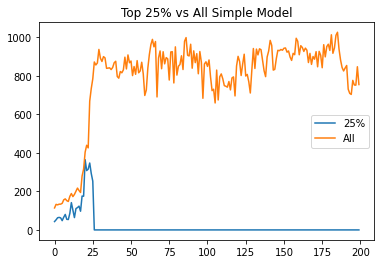

In [33]:
plt.title('Top 25% vs All Simple Model')

plt.plot(simple_friend_df.index, 
         simple_friend_df['standart deviation for top 25%'], 
         label = "25%")
plt.plot(simple_friend_df.index, 
         simple_friend_df['standart deviation for all'], 
         label = "All")
plt.legend()

plt.show()

### Complex

In [34]:
complex_friend_df = pd.read_csv(
    'friendly_on_complex_model/frindly_agent_datapoints_complex_model.csv', index_col = 0)

In [35]:
complex_friend_df

,best time,mean time for top 25%,standart deviation for top 25%,mean time for all,standart deviation for all
0,984.0,780.12500,54.620709,636.367188,112.254584
1,971.0,827.37500,55.365688,669.398438,126.119880
2,945.0,813.25000,46.307397,682.750000,103.249849
3,973.0,827.28125,46.586099,672.265625,125.185268
4,1096.0,864.28125,69.331285,687.273438,140.041552
...,...,...,...,...,...
195,3000.0,3000.00000,0.000000,1857.195312,1032.998639
196,3000.0,3000.00000,0.000000,1990.539062,1055.395075
197,3000.0,3000.00000,0.000000,2157.140625,1025.853834
198,3000.0,3000.00000,0.000000,1932.554688,1094.035826


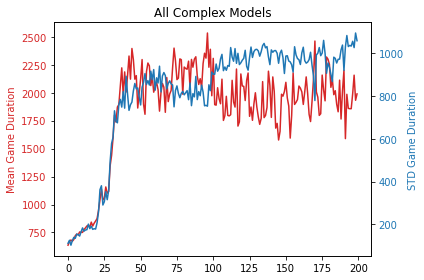

In [36]:
fig, ax1 = plt.subplots()

plt.title('All Complex Models')

color = 'tab:red'
ax1.set_ylabel('Mean Game Duration', color=color)
ax1.plot(complex_friend_df.index, 
         complex_friend_df['mean time for all'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('STD Game Duration', color=color)
ax2.plot(complex_friend_df.index, 
         complex_friend_df['standart deviation for all'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

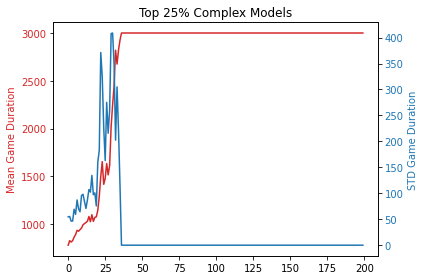

In [37]:
fig, ax1 = plt.subplots()

plt.title('Top 25% Complex Models')

color = 'tab:red'
ax1.set_ylabel('Mean Game Duration', color=color)
ax1.plot(complex_friend_df.index, 
         complex_friend_df['mean time for top 25%'], 
         color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('STD Game Duration', color=color)
ax2.plot(complex_friend_df.index, 
         complex_friend_df['standart deviation for top 25%'], 
         color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

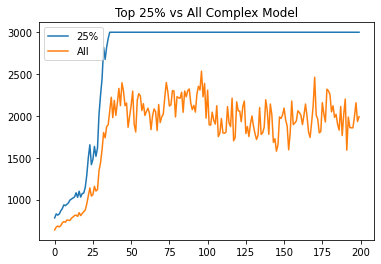

In [38]:
plt.title('Top 25% vs All Complex Model')

plt.plot(complex_friend_df.index, 
         complex_friend_df['mean time for top 25%'], 
         label = "25%")
plt.plot(complex_friend_df.index, 
         complex_friend_df['mean time for all'], 
         label = "All")
plt.legend()

plt.show()

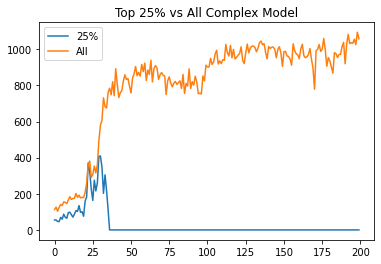

In [39]:
plt.title('Top 25% vs All Complex Model')

plt.plot(complex_friend_df.index, 
         complex_friend_df['standart deviation for top 25%'], 
         label = "25%")
plt.plot(complex_friend_df.index, 
         complex_friend_df['standart deviation for all'], 
         label = "All")
plt.legend()

plt.show()

### Compare Complex and Simple

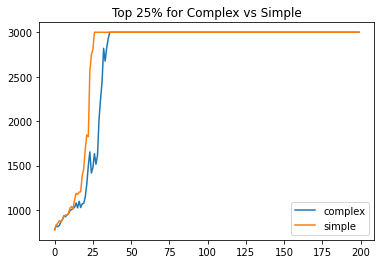

In [40]:
plt.title('Top 25% for Complex vs Simple')

plt.plot(complex_friend_df.index, 
         complex_friend_df['mean time for top 25%'], 
         label = "complex")
plt.plot(complex_friend_df.index, 
         simple_friend_df['mean time for top 25%'], 
         label = "simple")
plt.legend()

plt.show()

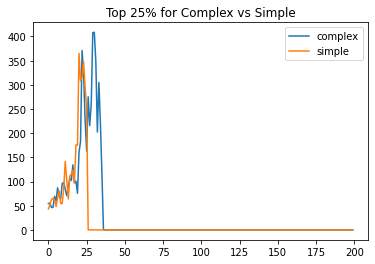

In [41]:
plt.title('Top 25% for Complex vs Simple')

plt.plot(complex_friend_df.index, 
         complex_friend_df['standart deviation for top 25%'], 
         label = "complex")
plt.plot(simple_friend_df.index, 
         simple_friend_df['standart deviation for top 25%'], 
         label = "simple")
plt.legend()

plt.show()

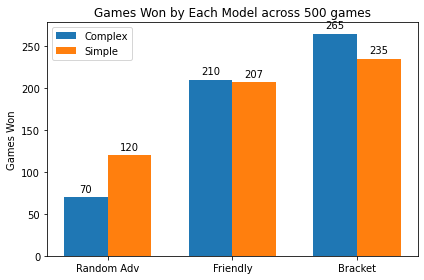

In [42]:
labels = ['Random Adv', 'Friendly', 'Bracket']
complex_means = [70, 210, 265]
simple_means = [120, 207, 235]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, complex_means, width, label='Complex')
rects2 = ax.bar(x + width/2, simple_means, width, label='Simple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Games Won')
ax.set_title('Games Won by Each Model across 500 games')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()